군집평가
===
실루엣 분석
---
### 군집평가 - 실루엣 분석
* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄.
* 실루엣 분석은 개별 데이터가 가지는 군집화 지표인 실루엣 계수(silhouette coefficient)를 기반으로 함.
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표임.
### 실루엣 계수
* silhouette coefficient : 개별 데이터가 가지는 군집화 지표
$$s(i) = \frac{b_i-a_i}{Max(a_i, b_i)}$$
* $a_{ij}$는 $i$번째 데이터에서 자신이 속한 클러스터 내의 다른 데이터 포인트 까지의 거리. 즉, $a_{12}는 1번 데이터에서 2번 데이터까지의 거리.
* $a_i$는 $i$번째 데이터에서 **_자신이 속한_** 클러스터 내의 다른 데이터 포인트들의 거리 평균. 즉, $a_i = mean(a_{12}, a_{13}, a_{14})$
* $b_i$는 $i$번째 데이터에서 가장 가까운 **_타_** 클러스터 내의 다른 데이터 포인트들의 거리 평균. 즉, $b_i = mean(b_{15}, b_{16}, b_{17}, b_{18})$
* 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 $(b_i-a_i)$이며, 이 값을 정규화 하기 위해 $Max(a_i,b_i)$ 값으로 나눔.
* 실루엣 계수는 $-1<s_i<1$ 의 값을 가지며, $1$에 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, $0$에 가까울 수록 근처의 군집과 가까워진다는 것. $(-)$ 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.
* 즉, 실루엣 계수가 1에 가까울수록 군집화가 잘 되었다는 의미이며, 실루엣 계수가 음수$(-)$인 경우는 해당 데이터의 군집화가 잘못 되었다는 뜻임.

### 사이킷런 실루엣분석 API
* 사이킷런 실루엣 분석 API
  * sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)
    * X : 개별 데이터, labels : 군집, metric : 거리 계산법.
    * **각 데이터 포인트의 실루엣 계수**를 계산해 반환함.
  * sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    * 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 **전체 데이터의 실루엣계수 값을 평균**해 반환함. 즉, np.mean(silhouette_samples())임.   
    * 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있음. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수 는 없음.
* 실루엣 분석에 기반한 좋은 군집 기준
  * 전체 실루엣 계수의 평균 값, 즉 사이킷런의 silhouette_score() 값은 $0~1$ 사이의 값을 가지며, 1에 가까울수록 좋음.
  * 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함.   
  * 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아님.

#### 실습 : 붓꽃 데이터에서 실루엣 계수 계산

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

# KMeans 군집화 수행
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(iris_df)
# 데이터당 클러스터 값 할당
iris_df["cluster"] = kmeans.labels_

print(iris_df.shape)
iris_df

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# iris의 모든 개별 데이터의 실루엣 계수값을 구함
scroe_samples = silhouette_samples(iris.data, iris_df["cluster"])
print(f"silhouette_samples() return 값의 shape : {scroe_samples.shape}")

# iris_df에 실루엣 계수 컬럼 추가
iris_df["silhouette_coeff"] = scroe_samples

# 모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(iris.data, iris_df["cluster"])
print(f"붓꽃 데이터셋 Silhouette Analysis Score : {average_score:.3f}")

iris_df

# 데이터 별 실루엣 계수
# 클러스터가 1인 데이터들은 0.8 정도의 실루엣 계쑤를 가지므로 군집화가 어느정도 잘 된 듯 함.
# 하지만 실루엣 계수 평균 값이 0.553인 이유는 
# 다른 클러스터에 할당된 데이터들의 실루엣 계수값이 작아서임.

silhouette_samples() return 값의 shape : (150,)
붓꽃 데이터셋 Silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [3]:
iris_df.groupby("cluster")["silhouette_coeff"].mean()

# 다른 클러스터의 실루엣 계수 평균이 상대적으로 작은 점 확인 가능함.

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<AxesSubplot:>

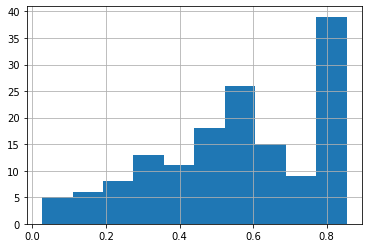

In [4]:
iris_df["silhouette_coeff"].hist()
# setosa는 군집화가 잘 되었지만, verginica와 virsicolor는 잘 되지 않음.
# 가장 오른쪽이 setosa.

#### 실루엣 계수 시각화를 통해 최적의 클러스터 수 찾기

* 데이터들의 실루엣 계수를 계산해서 시각화 해주는 함수

In [10]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features) :

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()로 리스트에 기재된 클러스터링 수만큼의 sub_figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists) :

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(f"Number of Cluster : {n_cluster} \n\
                            Silhouette Score : {round(sil_avg,3)}")
        axs[ind].set_xlabel("The silhouette coefficeint values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([]) # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx() 형태의 막대 그래프 표현
        for i in range(n_cluster) :
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

* 클러스터 수 변화시키면서 random 데이터 실루엣 계수 분포 시각화

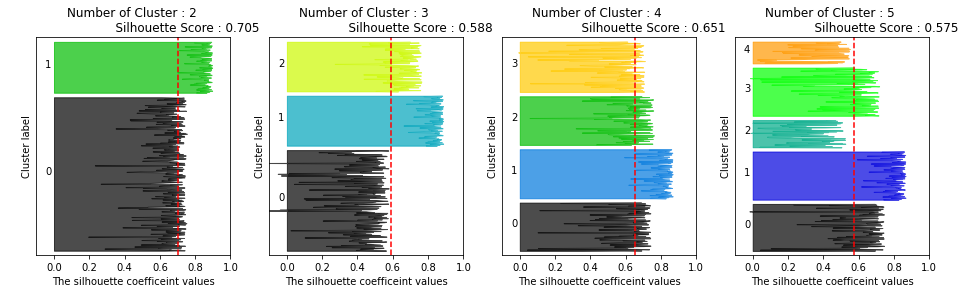

In [11]:
# make_blobs를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

# 클러스터의 개수가 2일 때 실루엣 스코어가 가장 높지만,
# 실제 분포를 살펴보면 한쪽으로 치우쳐 있음 → 좋은 분류라 하기 어려움.
# 임의 데이터를 생성할 때 클러스터를 4개로 나누었으므로,
# 실제 데이터에 적합한 클러스터 개수는 실루엣 스코어가 상대적으로 낮은 4개.
# 분류를 적용할 때 주의해야 함.

* 클러스터 수 변화시키면서 붓꽃 데이터 실루엣 계수 분포 시각화

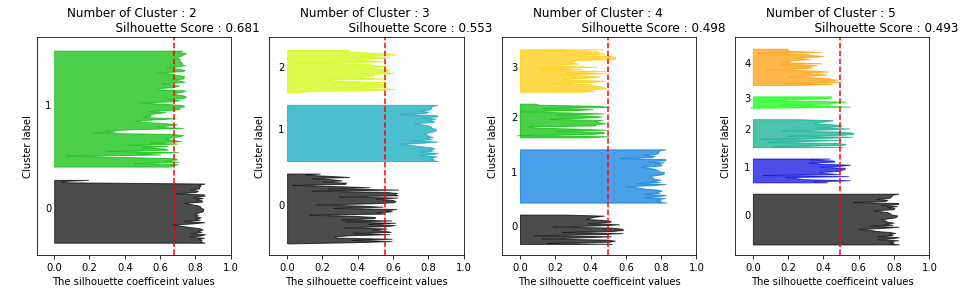

In [12]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

# 붓꽃 데이터 역시 본 데이터가 3개의 레이블을 가지고 있으므로,
# 가장 적합한 클러스터 개수는 상대적으로 실루엣 점수가 낮더은 3개임을 알 수 있음. 